In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 

In [48]:
player_list = []

for i in range(1,3):
    url = 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop/mw/ajax/yw1/sp/page/3/5/10/page/8//page/' + str(i)
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
    r = requests.get(url, headers=headers)

    # 이 부분이 뭔지 잘 모르겠넨 
    soup = BeautifulSoup(r.content, 'html.parser') # r.content 혹은 r.text
    soup.find_all()

    player_info = soup.find_all('tr', class_=['odd','even'])

    for info in player_info:
        player = info.find_all('td')
        number = (player[0].text)
        name = (player[3].text)
        position = (player[4].text)
        age = (player[5].text)
        nation = (player[6].img['alt'])
        team = (player[7].a['title'])
        value = (player[8].text)

        player_list.append([number, name, position, age, nation, team, value])

In [49]:
df = pd.DataFrame(player_list, columns=['number', 'name', 'position', 'age', 'nation', 'team', 'value'])

df.to_csv('transfermarkt50.csv', index=False)
df.set_index('number', inplace=True)
df.rename(columns={'team': 'club'}, inplace=True)

In [50]:
df['value'] = df['value'].str.replace('€','')
df['value'] = df['value'].str.replace('m','')
df['value'] = df['value'].astype(float)
df['age']=df['age'].astype(int)

In [51]:
df['시장 가치(억)'] = df['value']*13
df.drop(columns='value', inplace=True)

In [52]:
df.describe()

,age,시장 가치(억)
count,50.000000,50.000000
mean,24.140000,1201.200000
std,2.626474,364.454527
min,19.000000,910.000000
25%,22.000000,975.000000
50%,24.000000,1072.500000
75%,26.000000,1300.000000
max,30.000000,2340.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      50 non-null     object 
 1   position  50 non-null     object 
 2   age       50 non-null     int32  
 3   nation    50 non-null     object 
 4   club      50 non-null     object 
 5   시장 가치(억)  50 non-null     float64
dtypes: float64(1), int32(1), object(4)
memory usage: 2.5+ KB


In [54]:
df['age'].mean()

24.14

In [55]:
df['시장 가치(억)'].sum()

60060.0

In [56]:
df['nation'].mode() # 최빈 값

0    England
Name: nation, dtype: object

In [62]:
df[df['nation']=='England']
g = df.groupby('nation')
g.size()


nation
Argentina      3
Brazil         6
Canada         1
Colombia       1
Croatia        1
Ecuador        1
England        9
France         6
Georgia        1
Germany        4
Hungary        1
Italy          1
Netherlands    2
Nigeria        1
Norway         2
Portugal       4
Spain          3
Sweden         1
Uruguay        2
dtype: int64

In [63]:
g.count()

,name,position,age,club,시장 가치(억)
nation,,,,,
Argentina,3,3,3,3,3
Brazil,6,6,6,6,6
Canada,1,1,1,1,1
Colombia,1,1,1,1,1
Croatia,1,1,1,1,1
Ecuador,1,1,1,1,1
England,9,9,9,9,9
France,6,6,6,6,6
Georgia,1,1,1,1,1


In [66]:
g[['age','시장 가치(억)']].sum()

,age,시장 가치(억)
nation,,
Argentina,71,3640.0
Brazil,144,7280.0
Canada,23,910.0
Colombia,26,975.0
Croatia,21,1040.0
Ecuador,22,1170.0
England,225,11830.0
France,142,7540.0
Georgia,22,1040.0


In [84]:
c = df.groupby('club')
c['시장 가치(억)'].sum().sort_values(ascending=False)
values = c['시장 가치(억)'].sum().sort_values(ascending=False)
values_head = values.head()
values_head

club
Manchester City    10400.0
Real Madrid        10140.0
Arsenal FC          7150.0
Bayern Munich       5785.0
FC Barcelona        4290.0
Name: 시장 가치(억), dtype: float64

In [72]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 글씨체
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False # 음수 사용

<BarContainer object of 5 artists>

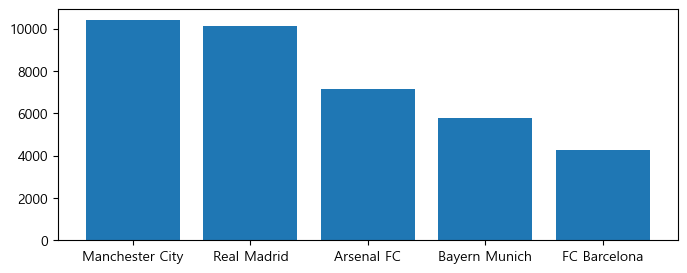

In [88]:
values
plt.figure(figsize=(8,3))
plt.bar(values_head.index, values_head)